In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder() 

In [355]:
newdata = pd.DataFrame()
final_df = pd.DataFrame()
dataset = pd.read_csv("innercity.csv")

In [356]:
def yr_sold():
    newdata['yr_sold']=newdata['dayhours'].apply(lambda x:x[:4]).astype(int)
    newdata['house_age']=newdata['yr_sold']-newdata['yr_built']
    newdata['house_age']=newdata['house_age'].abs()
    
    dataset['yr_sold']=dataset['dayhours'].apply(lambda x:x[:4]).astype(int)
    dataset['house_age']=dataset['yr_sold']-dataset['yr_built']
    dataset['house_age']=dataset['house_age'].abs()
    

In [357]:
def dtype_transformation():    
    newdata['ceil'] = newdata.ceil.astype('category')
    newdata['coast'] = newdata.coast.astype('category')
    newdata['sight'] = newdata.sight.astype('category')
    newdata['condition'] = newdata.condition.astype('category')
    newdata['quality'] = newdata.quality.astype('category')
    newdata['furnished'] = newdata.furnished.astype('category')

In [358]:
def meanEnc (indFeatureName):
    #compute global mean
    tar_mean = dataset.price.mean()
    #compute the number of values and mean of each group
    agg = dataset.groupby(indFeatureName)['price'].agg(['count','mean'])
    counts = agg['count']
    means = agg['mean']
    weight = 100
    #compute smoothed means
    smooth = (counts * means + weight * tar_mean)/(counts + weight)
    print (smooth)
    smooth1 = smooth.copy()
    smooth = smooth.reset_index()
    grpDF = pd.DataFrame(smooth, columns=smooth.columns)
    grpDF.rename(columns = {indFeatureName:'key', 0:"val"}, inplace = True) 
    grpDF.set_index("key", inplace = True) 
    #grpDF.to_csv('../data/'+indFeatureName+'.csv')
    dataset.loc[:,indFeatureName+'_enc'] = dataset[indFeatureName].map(smooth1)


In [359]:
def imputeoutlier (col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3+(1.5*IQR)
    min_value = Q1-(1.5*IQR) 
    house_df.loc[(col < min_value) | (col > max_value), col.name] = col.median()

In [360]:
def fixOutlier():
    global dataset
    imputeoutlier (dataset.room_bed)
    imputeoutlier (dataset.room_bath)
    imputeoutlier (dataset.living_measure)
    imputeoutlier (dataset.living_measure15)
    imputeoutlier (dataset.lot_measure)
    imputeoutlier (dataset.lot_measure15)
    imputeoutlier (dataset.basement)
    imputeoutlier (dataset.ceil_measure)
    imputeoutlier (dataset.total_area)

In [361]:
def binZipcodes():
    global dataset
    global newdata
    replaceStruct = {
                "zipcode": {98001 : "Auburn", 98002 : "Auburn", 98003 : "Federal Way" , 98004 : "Bellevue" ,98005 : "Bellevue",
                            98006 : "Bellevue", 98007 : "Bellevue", 98008 : "Bellevue", 98010 : "Black Diamond", 98011 : "Bothell",
                            98014 : "Carnation", 98019 : "Duvall", 98022 : "Enumclaw", 98023 : "Federal Way", 98024 : "Fall City",
                            98027 : "Issaquah", 98028 : "Kenmore", 98029 : "Issaquah" , 98030 : "Kent", 98031 : "Kent",
                            98032 : "kent", 98033 : "Kirkland", 98034 : "Kirkland", 98038 : "Maple Valley", 98039 : "Medina",
                            98040 : "Mercer Island", 98042 : "Kent", 98045 : "North Bend", 98052 : "Redmond", 98053 : "Redmond",
                            98055 : "Renton", 98056 : "Renton", 98058 : "Renton", 98059 : "Renton", 98065 : "Snoqualmie", 98072 : "Woodinville",
                            98070 : "Vashon", 98074 : "Sammamish", 98075 : "Sammamish", 98077 : "Woodinville", 98092 : "Auburn",
                            98102 : "Seattle", 98103 : "Seattle" ,98105 : "Seattle" , 98106 : "Seattle",
                            98107 :"Seattle" ,98108 : "Seattle", 98109 : "Seattle", 98112 : "Seattle", 98115:"Seattle", 98116:"Seattle", 98117:"Seattle", 98118:"Seattle", 98119:"Seattle",
                            98122 :"Seattle", 98125:"Seattle", 98126:"Seattle", 98133 :"Seattle", 98136:"Seattle", 98144:"Seattle", 98146:"Seattle", 98148:"Seattle", 98155:"Seattle",
                            98166 : "Seattle", 98168:"Seattle", 98177:"Seattle", 98178:"Seattle", 98188:"Seattle", 98198:"Seattle", 98199:"Seattle"
                            }
                }
    
    dataset= dataset.replace(replaceStruct)
    
    newdata= newdata.replace(replaceStruct)


In [362]:
def binCondition():
    condition = [
    dataset['condition'] == 1,
    dataset['condition'] == 2,
    dataset['condition'] == 3,
    dataset['condition'] == 4,
    dataset['condition'] == 5        
    ]
    
    condition_newdata = [
   newdata['condition'] == 1,
   newdata['condition'] == 2,
   newdata['condition'] == 3,
   newdata['condition'] == 4,
   newdata['condition'] == 5        
   ]
    
    choices = ['1', '1', '2', '2', '3']
    dataset['condition_bin'] = np.select(condition, choices)
    newdata['condition_bin'] = np.select(condition_newdata, choices)
    
def binQuality():
    quality = [
    dataset['quality'] < 7,
    dataset['quality'] == 7,
    dataset['quality'] == 8,
    dataset['quality'] == 9,
    dataset['quality'] == 10,
    dataset['quality'] > 10
    ]
    quality_newdata = [
    newdata['quality'] < 7,
    newdata['quality'] == 7,
    newdata['quality'] == 8,
    newdata['quality'] == 9,
    newdata['quality'] == 10,
    newdata['quality'] > 10
    ]
    choices = ['1','1','2', '2','2','3']
    dataset['quality_bin'] = np.select(quality,choices)
    newdata['quality_bin'] = np.select(quality_newdata,choices)

def binRoomBed():   
    room_bed = [
    dataset['room_bed'] == 2,
    dataset['room_bed'] == 3,
    dataset['room_bed'] == 4,
    dataset['room_bed'] == 5
    ]
    room_bed_newdata = [
    newdata['room_bed'] == 2,
    newdata['room_bed'] == 3,
    newdata['room_bed'] == 4,
    newdata['room_bed'] == 5
    ]
    
    choices = ['1','2','2', '3']
    dataset['room_bed_bin'] = np.select(room_bed,choices)
    newdata['room_bed_bin'] = np.select(room_bed_newdata,choices)
    
def binRoomBath():
    room_bath = [
    dataset['room_bath'] < 2,
    dataset['room_bath'] == 2.25,
    dataset['room_bath'] == 2.5,
    dataset['room_bath'] > 2.5
    ]
    room_bath_newdata = [
    newdata['room_bath'] < 2,
    newdata['room_bath'] == 2.25,
    newdata['room_bath'] == 2.5,
    newdata['room_bath'] > 2.5
    ]
    
    choices = ['1','2','2','3']
    dataset['room_bath_bin'] = np.select(room_bath,choices)
    newdata['room_bath_bin'] = np.select(room_bath_newdata,choices)
    
def binCeil():   
    ceil = [
    dataset['ceil'] < 2,
    dataset['ceil'] == 2,
    dataset['ceil'] == 2.5,
    dataset['ceil'] > 2.5
    ]
    ceil_newdata = [
    newdata['ceil'] < 2,
    newdata['ceil'] == 2,
    newdata['ceil'] == 2.5,
    newdata['ceil'] > 2.5
    ]
    
    choices = ['1','2','2', '3']
    dataset['ceil_bin'] = np.select(ceil,choices)
    newdata['ceil_bin'] = np.select(ceil_newdata,choices)
    
    
def binSight():  
    sight = [
    dataset['sight'] == 0,
    dataset['sight'] == 1,
    dataset['sight'] == 2,
    dataset['sight'] == 3,
    dataset['sight'] == 4
    ]
    sight_newdata = [
    newdata['sight'] == 0,
    newdata['sight'] == 1,
    newdata['sight'] == 2,
    newdata['sight'] == 3,
    newdata['sight'] == 4
    ]
    
    choices = ['0','1','1','1','2']
    dataset['sight_bin'] = np.select(sight,choices)
    newdata['sight_bin'] = np.select(sight_newdata,choices)
    
def binYearBuilt():    
    year_built = [
    dataset['yr_built'] <= 1925,
    (dataset['yr_built'] >= 1926) & (dataset['yr_built'] <= 1950),
    (dataset['yr_built'] >= 1951) & (dataset['yr_built'] <= 1975),
    (dataset['yr_built'] >= 1976) & (dataset['yr_built'] <= 1990),
    (dataset['yr_built'] >= 1991) & (dataset['yr_built'] <= 2000),
    dataset['yr_built'] >= 2001
    ]
    year_built_newdata= [
     newdata['yr_built'] <= 1925,
    (newdata['yr_built'] >= 1926) & (newdata['yr_built'] <= 1950),
    (newdata['yr_built'] >= 1951) & (newdata['yr_built'] <= 1975),
    (newdata['yr_built'] >= 1976) & (newdata['yr_built'] <= 1990),
    (newdata['yr_built'] >= 1991) & (newdata['yr_built'] <= 2000),
    newdata['yr_built'] >= 2001
    ]
    
    choices = ['1','2','3','4','5','6']
    dataset['yr_built_bin'] = np.select(year_built,choices)
    newdata['yr_built_bin'] = np.select(year_built_newdata,choices)
  
    
def binHouseAge():
    house_age = [
    dataset['house_age'] < 15,
    (dataset['house_age'] >= 15) & (dataset['house_age'] <= 30),
    (dataset['house_age'] >= 31) & (dataset['house_age'] <= 45),
    (dataset['house_age'] >= 46) & (dataset['house_age'] <= 60),
    (dataset['house_age'] >= 61) & (dataset['house_age'] <= 75),
    (dataset['house_age'] >= 76) & (dataset['house_age'] <= 90),
    (dataset['house_age'] >= 91) & (dataset['house_age'] <= 105),
    dataset['house_age'] >= 105
    ]
    house_age_newdata = [
    newdata['house_age'] < 15,
    (newdata['house_age'] >= 15) & (newdata['house_age'] <= 30),
    (newdata['house_age'] >= 31) & (newdata['house_age'] <= 45),
    (newdata['house_age'] >= 46) & (newdata['house_age'] <= 60),
    (newdata['house_age'] >= 61) & (newdata['house_age'] <= 75),
    (newdata['house_age'] >= 76) & (newdata['house_age'] <= 90),
    (newdata['house_age'] >= 91) & (newdata['house_age'] <= 105),
    newdata['house_age'] >= 105
    ]
    
    choices = ['1','2','3','4','5','6','7','8']
    dataset['house_age_bin'] = np.select(house_age,choices)
    newdata['house_age_bin'] = np.select(house_age_newdata,choices)
    
def binYrRenovated():    
    yr_renovated =[
    (dataset['yr_renovated']) >= 0    & (dataset['yr_renovated'] <= 1925),
    (dataset['yr_renovated']) >= 1926 & (dataset['yr_renovated'] <= 1950),
    (dataset['yr_renovated']) >= 1951 & (dataset['yr_renovated'] <= 1975),
    (dataset['yr_renovated']) >= 1976 & (dataset['yr_renovated'] <= 1990),
    dataset['yr_renovated'] >= 1991
    ]
    yr_renovated_newdata =[
    (newdata['yr_renovated']) >= 0    & (newdata['yr_renovated'] <= 1925),
    (newdata['yr_renovated']) >= 1926 & (newdata['yr_renovated'] <= 1950),
    (newdata['yr_renovated']) >= 1951 & (newdata['yr_renovated'] <= 1975),
    (newdata['yr_renovated']) >= 1976 & (newdata['yr_renovated'] <= 1990),
    newdata['yr_renovated'] >= 1991
    ]
    
    choices = ['0','1','2','3','4']
    dataset['yr_renovated_bin'] = np.select(yr_renovated,choices)
    newdata['yr_renovated_bin'] = np.select(yr_renovated_newdata,choices)
        
def binLatLong():
    longmin = dataset['long'].min()
    latmin = dataset['lat'].min()
    
    data_ = {'key':['longmin', 'latmin', ], 'val':[longmin, latmin]} 
    lat_long_df = pd.DataFrame(data_) 
    lat_long_df.set_index("key", inplace = True) 
    
    dataset['long_bin'] = dataset['long'].apply(lambda val: round(( abs(longmin) - abs(val)) /.2))
    dataset['lat_bin'] = dataset['lat'].apply(lambda val: round(( abs(val) - abs(latmin) )/.2))
    dataset['region'] = dataset.apply (lambda row: str(row['long_bin'])+'-'+str(row['lat_bin']), axis=1)
    dataset['Region_name']= dataset.apply (lambda row: "Region"+'-'+str(row['region']), axis=1)
    
    newdata['long_bin'] = newdata['long'].apply(lambda val: round(( abs(longmin) - abs(val)) /.2))
    newdata['lat_bin'] = newdata['lat'].apply(lambda val: round(( abs(val) - abs(latmin) )/.2))
    newdata['region'] = newdata.apply (lambda row: str(row['long_bin'])+'-'+str(row['lat_bin']), axis=1)
    newdata['Region_name']= newdata.apply (lambda row: "Region"+'-'+str(row['region']), axis=1)
    

In [363]:
def applyMeanEnc():
    meanEnc( dataset.room_bed_bin.name)
    meanEnc( dataset.room_bath_bin.name)
    meanEnc( dataset.condition_bin.name)
    meanEnc( dataset.quality_bin.name)
    meanEnc( dataset.ceil_bin.name)
    meanEnc( dataset.sight_bin.name)
    meanEnc( dataset.yr_built_bin.name)
    meanEnc( dataset.house_age_bin.name)
    meanEnc( dataset.yr_renovated_bin.name)
    meanEnc( dataset.zipcode.name)
    #meanEnc( dataset.Region_name.name)
    meanEnc( dataset.furnished.name)
    meanEnc( dataset.coast.name)
    
    meanEnc( newdata.room_bed_bin.name)
    meanEnc( newdata.room_bath_bin.name)
    meanEnc( newdata.condition_bin.name)
    meanEnc( newdata.quality_bin.name)
    meanEnc( newdata.ceil_bin.name)
    meanEnc( newdata.sight_bin.name)
    meanEnc( newdata.yr_built_bin.name)
    meanEnc( newdata.house_age_bin.name)
    meanEnc( newdata.yr_renovated_bin.name)
    meanEnc( newdata.zipcode.name)
    #meanEnc( newdata.Region_name.name)
    meanEnc( newdata.furnished.name)
    meanEnc( newdata.coast.name)

In [364]:
#lets create a function to drop columns
def dropcols (col_list):
    for col in col_list:
        if col in dataset.columns:
            dataset.drop(col,axis=1,inplace=True)
            print("dropped column: " + col)                                                            

In [365]:
def dropfeatures():
    col=[ 'cid','lat', 'long','dayhours','room_bed', 'room_bath','ceil','sight', 'condition','zipcode', 'quality','yr_built','living_measure15', 
     'lot_measure15','yr_sold', 'price_bin','condition_bin', 'quality_bin', 'room_bed_bin', 'room_bath_bin','ceil_bin',
     'sight_bin', 'yr_built_bin', 'house_age_bin','yr_renovated_bin','Region_name','region','furnished','coast','lat_bin','long_bin','yr_renovated_bin_enc','yr_built_bin_enc','condition_bin_enc']
    dropcols(col)
    

In [366]:
def eliminate_nan():
    global dataset,newdata
    dataset=dataset.fillna(dataset.mean())
    newdata=newdata.fillna(newdata.mean())

In [367]:
def setDataTypes():
    global newdata
    convert_dict = {'cid': object, 
                'dayhours': object,
                'room_bed': float,
                'room_bath': float,
                'living_measure': float,
                'lot_measure': float,
                'ceil': float,
                'coast': int,
                'sight': int,
                'condition': int,
                'quality': int,
                'ceil_measure': float,
                'basement': float,
                'yr_built': int,
                'yr_renovated': int,
                'zipcode': int,
                'lat': float,
                'long': float,
                'living_measure15': float,
                'lot_measure15': float,
                'furnished': int,
                'total_area': float
               }  
    newdata = newdata.astype(convert_dict) 

[3034200666, '20141107T000000', 4, 3.25, 3020, 13457, 1, 0, 0, 5, 9, 3020, 0, 1956, 0, 98133, 47.7174, -122.336, 2120, 7553, 1, 16477]
Data Types Set for all Features
House_age is calculated..
Outliers are detected and imputed using median..
zipcode binning..
Condition binning..
Quality binning..
RoomBed binning..
RoomBath binning..
Ceil binning..
sight binning..
yrBuilt binning..
Houseage binning..
YrRenovated binning..
latlong binning..
room_bed_bin
0    629569.998265
1    406240.698559
2    536039.245084
3    772371.365008
dtype: float64
room_bath_bin
0    461958.065458
1    398262.496181
2    548072.713681
3    875185.617594
dtype: float64
condition_bin
1    398508.459865
2    536125.650423
3    608557.998823
dtype: float64
quality_bin
1    3.819671e+05
2    6.642811e+05
3    1.490369e+06
dtype: float64
ceil_bin
1    460575.217485
2    655572.372134
3    580632.216199
dtype: float64
sight_bin
0    4.968459e+05
1    8.310487e+05
2    1.243795e+06
dtype: float64
yr_built_bin
1    595

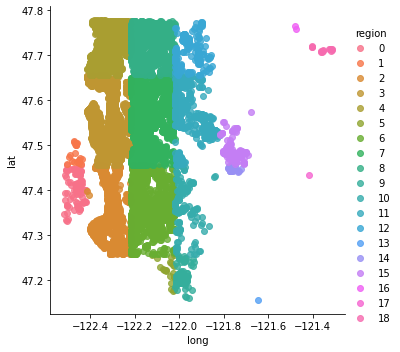

In [368]:
def data_preprocessing(inputData):
    global newdata 
    cols = ['cid', 'dayhours', 'room_bed', 'room_bath', 'living_measure',\
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',\
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',\
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',\
       'total_area']
    newdata = pd.DataFrame([inputData], columns=cols)  
    setDataTypes()
    print ("Data Types Set for all Features")
    yr_sold()
    print('House_age is calculated..')
    fixOutlier()
    print('Outliers are detected and imputed using median..')
    binZipcodes()
    print('zipcode binning..')
    binCondition()
    print('Condition binning..')
    binQuality()
    print('Quality binning..')
    binRoomBed()
    print('RoomBed binning..')
    binRoomBath()
    print('RoomBath binning..')
    binCeil()
    print('Ceil binning..')
    binSight()
    print('sight binning..')
    binYearBuilt()
    print('yrBuilt binning..')
    binHouseAge()
    print('Houseage binning..')
    binYrRenovated()
    print('YrRenovated binning..')
    latlongbin()
    print('latlong binning..')
    applyMeanEnc()
    print('mean encoding..')
    eliminate_nan()
    print('transforming NaN values..')
    dtype_transformation()
    print('Some of the attributes are converted to categorical dtype..')
    dropfeatures()
    print('Dropping unwanted columns..')

def predictPrice():
    global final_df
    model_cols=['living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_renovated', 'total_area', 'house_age', 'room_bed_bin_enc',
       'room_bath_bin_enc', 'quality_bin_enc', 'ceil_bin_enc', 'sight_bin_enc',
       'house_age_bin_enc', 'zipcode_enc', 'Region_name_enc', 'furnished_enc',
       'coast_enc']
    
    for col in model_cols:
        if col in dataset.columns:
            final_df[col]=dataset[col]
        else:
            final_df[col]=0
            
    import pickle   
  
    model = pickle.load(open('C:/Users/Administrator/Desktop/CAPSTONE/model/housePrice.pkl', 'rb'))  
    print ("Model Loaded... ")
    result = model.predict([list(final_df.loc[0])])
    print ("Predict value ===> {} ".format(result))
    return result

def test():
    """A simple method to read a input data and pass it to the 
    processing method """
    tempDf = pd.DataFrame()
    tempDf = pd.read_csv('input.csv')
    inputData = list(tempDf.loc[0])
    
    print (inputData)
    
    data_preprocessing(inputData)
    predictPrice()

    
test()